# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
print(a[-3:])

# reverse the list
a.reverse()
print(a)

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a.reverse()
m = map(lambda n: n**2, a)
l = list(m)
print(l)

[4, 5, 6]
[6, 5, 4, 3, 2, 1]
[1, 4, 9, 16, 25, 36]


In [2]:
# create a numpy array from this list
import numpy as np
b = np.array(a) # change this
b

array([1, 2, 3, 4, 5, 6])

In [3]:
# find the mean of b
b.mean()

3.5

In [4]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([ 1,  4,  9, 16, 25, 36])

In [5]:
# change b from a length-6 list to a 2x3 matrix
r = b.reshape(2,3)
r

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
# find the mean value of each row
np.mean(r, axis = 1)

array([2., 5.])

In [7]:
# find the mean value of each column
np.mean(r, 0)

array([2.5, 3.5, 4.5])

In [8]:
# find the third column of b
r[:,[2]]

array([[3],
       [6]])

In [9]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')

In [10]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

193.87190082644628

In [11]:
# how many different categories of beverages are there?
len(df['beverage category'].unique())

9

In [12]:
# what is the average # calories for each beverage category?
df.groupby('beverage category')['calories'].mean()

beverage category
classic espresso drinks             140.172414
coffee                                4.250000
frappuccino blended coffee          276.944444
frappuccino blended creme           233.076923
frappuccino light blended coffee    162.500000
shaken iced beverages               114.444444
signature espresso drinks           250.000000
smoothies                           282.222222
tazo tea drinks                     177.307692
Name: calories, dtype: float64

In [13]:
# what beverage preparation includes the most sugar on average?
df.groupby('beverage prep')['sugars '].mean()
# apparently I left a space at the end of some of my column names :/ sorry

beverage prep
2% Milk               30.980000
Doppio                 0.000000
Grande                20.000000
Grande Nonfat Milk    38.615385
Short                  8.250000
Short Nonfat Milk     17.000000
Solo                   0.000000
Soymilk               31.848485
Tall                  14.714286
Tall Nonfat Milk      28.521739
Venti                 27.714286
Venti Nonfat Milk     50.045455
Whole Milk            55.687500
Name: sugars , dtype: float64

In [14]:
# what is the average % daily value calcium content for each beverage?
df.groupby('beverage')['calcium '].mean()

beverage
banana chocolate smoothie                            20.000000
brewed coffee                                         0.500000
caffe americano                                       1.500000
caffe latte                                          35.000000
caffe mocha without whipped cream                    30.000000
cappuccino                                           22.500000
caramel                                              11.000000
caramel apple spice without whipped cream             0.000000
caramel macchiato                                    28.333333
caramel without whipped cream                        12.000000
coffee                                               12.333333
espresso                                              0.000000
hot chocolate without whipped cream                  35.000000
iced brewed coffee with classic syrup                 0.000000
iced brewed coffee with milk and classic syrup        8.000000
java chip                                     

In [15]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
p = df.groupby('beverage')['protein '].mean()
c = df.groupby('beverage')['calories'].mean()

# want highest protein per calorie content
ProtPerCal = p / c
maxProtPerCal = ProtPerCal.max()
print(maxProtPerCal)
ProtPerCal
#from ProtPerCal: .164 corresponds to brewed coffee
print('brewed coffee')

0.16470588235294117
brewed coffee


<AxesSubplot:ylabel='Frequency'>

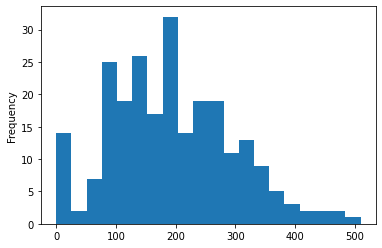

In [16]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt

df['calories'].plot.hist(bins=20)

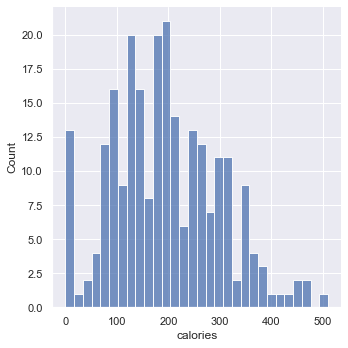

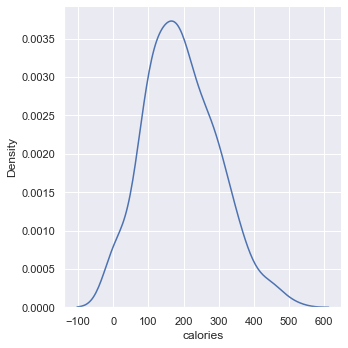

In [17]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set() 

sns.displot(data = df, x = 'calories', bins=30)

sns.displot(data = df, x = 'calories', kind = 'kde')

<AxesSubplot:xlabel='calories', ylabel='total fat '>

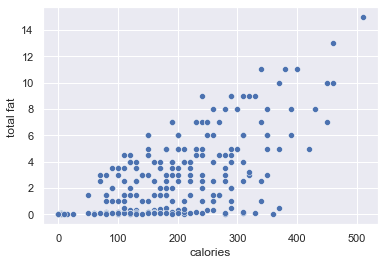

In [18]:
# plot calories against total fat using seaborn
sns.scatterplot(data = df, x = 'calories', y = 'total fat ')

beverage prep
Short                AxesSubplot(0.125,0.125;0.775x0.755)
Short Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Name: calories, dtype: object

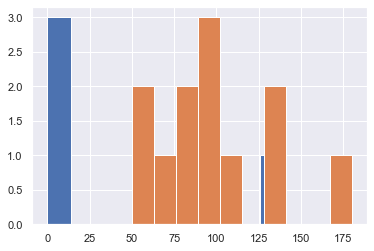

In [19]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

short = df[df['beverage prep'] == 'Short']
shortNonfat = df[df['beverage prep'] == 'Short Nonfat Milk']
shortAll = short.append(shortNonfat)

tall = df[df['beverage prep'] == 'Tall']
tallNonfat = df[df['beverage prep'] == 'Tall Nonfat Milk']
tallAll = tall.append(tallNonfat)

grande = df[df['beverage prep'] == 'Grande']
grandeNonfat = df[df['beverage prep'] == 'Grande Nonfat Milk']
grandeAll = grande.append(grandeNonfat)
grandeAll

venti = df[df['beverage prep'] == 'Venti']
ventiNonfat = df[df['beverage prep'] == 'Venti Nonfat Milk']
ventiAll = venti.append(ventiNonfat)

shortAll.groupby('beverage prep')['calories'].hist()


beverage prep
Tall                AxesSubplot(0.125,0.125;0.775x0.755)
Tall Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Name: calories, dtype: object

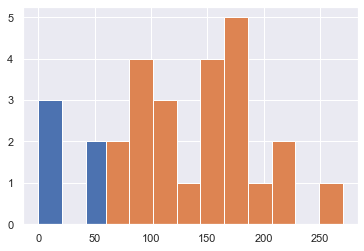

In [20]:
tallAll.groupby('beverage prep')['calories'].hist()

beverage prep
Grande                AxesSubplot(0.125,0.125;0.775x0.755)
Grande Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Name: calories, dtype: object

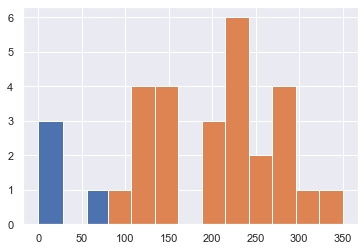

In [21]:
grandeAll.groupby('beverage prep')['calories'].hist()

beverage prep
Venti                AxesSubplot(0.125,0.125;0.775x0.755)
Venti Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Name: calories, dtype: object

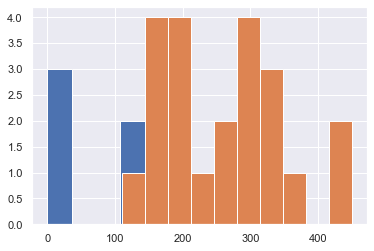

In [22]:
ventiAll.groupby('beverage prep')['calories'].hist()